 #  Portflio Comparrison Challenge

In this challenge, I evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 over a 6 year period.

Then, I create a portoflio of my own consisting of four stocks picked at random. Cody, CMG, NTFLX & EL. At compare it to the algorithim, hedge and mutual fund portfolios. 


In [4]:
!pip install yfinance
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import yfinance as yf 
import seaborn as sns


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df = whale_returns_df.sort_index(ascending= True)

In [6]:
# Count nulls
whale_returns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [7]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index(ascending=True)

In [9]:
# Count nulls
algo_returns_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [12]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [14]:
# Calculate Daily Returns
SP_daily_returns = sp500_history_df.pct_change()

In [15]:
# Drop nulls
SP_daily_returns = SP_daily_returns.dropna()


In [16]:
# Rename Column
SP_daily_returns.rename(columns = {'Close':'S&P 500'}, inplace = True) 
SP_daily_returns = SP_daily_returns.sort_index(ascending=True)

In [17]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df,algo_returns_df,SP_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

From the below charts I make the following conculsionsL
1. Algo 1 has performed better than the other portfolios, when viewing their cumulative returns and outperforms the S&P 500.
2. BERKSHIRE HATHAWAY INC is the riskiest of portfolios from the analysis. 
3. SOROS FUND MANAGEMENT LLC closely mimics the S&P 500. 
4. BERKSHIRE HATHAWAY INC does not seem to move with the S&P 500, and is negatively correlated to the S&P 500 -0.013856.
5. The algorithmic strategies do not outperform booth the market and the whale portfolios according to the Sharpe ratio plot. 


## Performance

Calculate and Plot the daily returns and cumulative returns. 

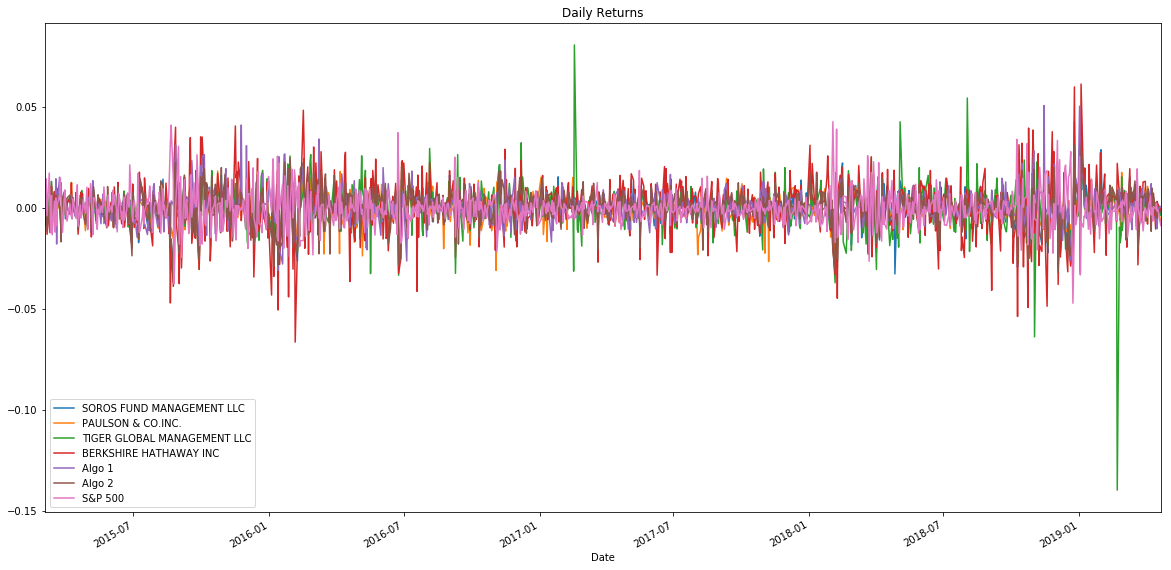

In [18]:
combined_df.plot(figsize=(20,10),title=('Daily Returns'))

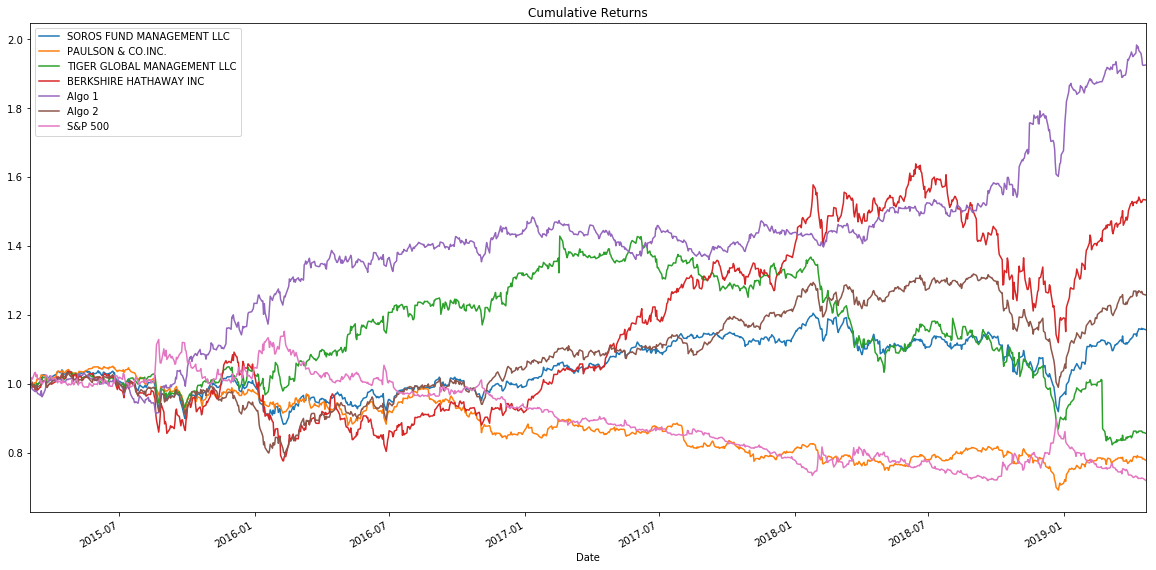

In [19]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10),title=('Cumulative Returns'))



---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

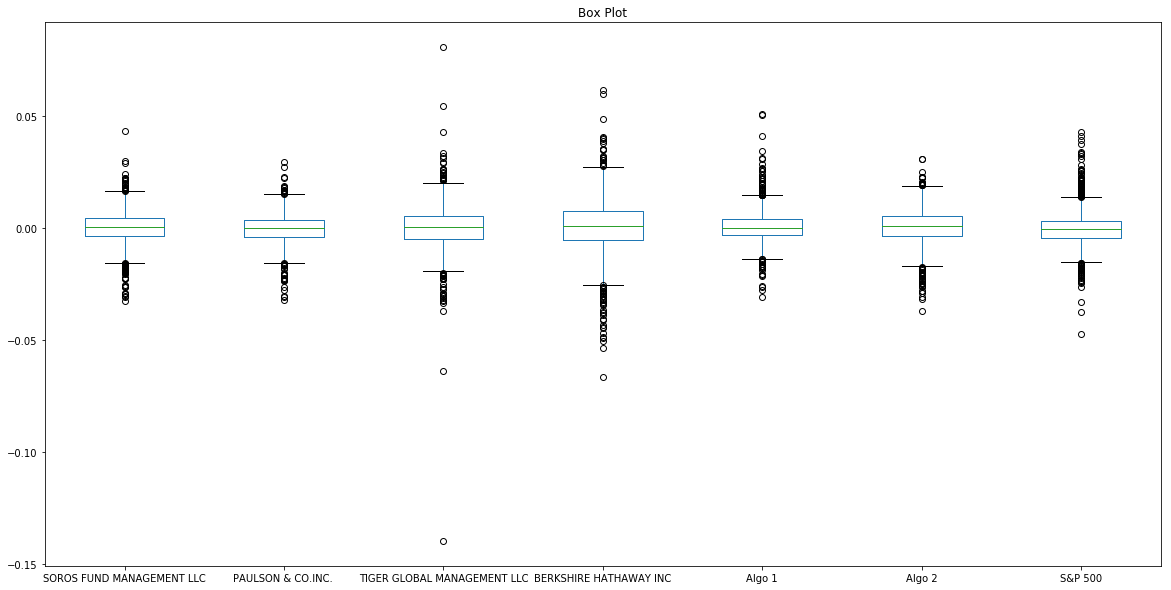

In [20]:
combined_df.plot.box(figsize=(20,10),title=('Box Plot'))

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = combined_df.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head(7)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

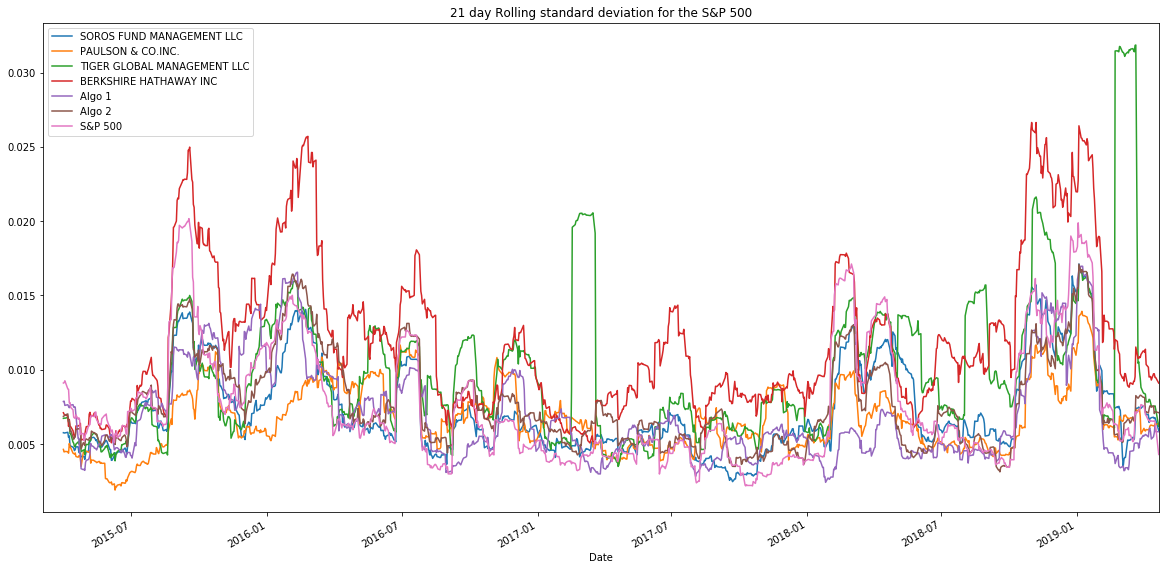

In [24]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_df.rolling(window=21).std().plot(figsize=(20,10),title=('21 day Rolling standard deviation for the S&P 500'))

In [25]:
# Correlation
price_correlation = combined_df.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


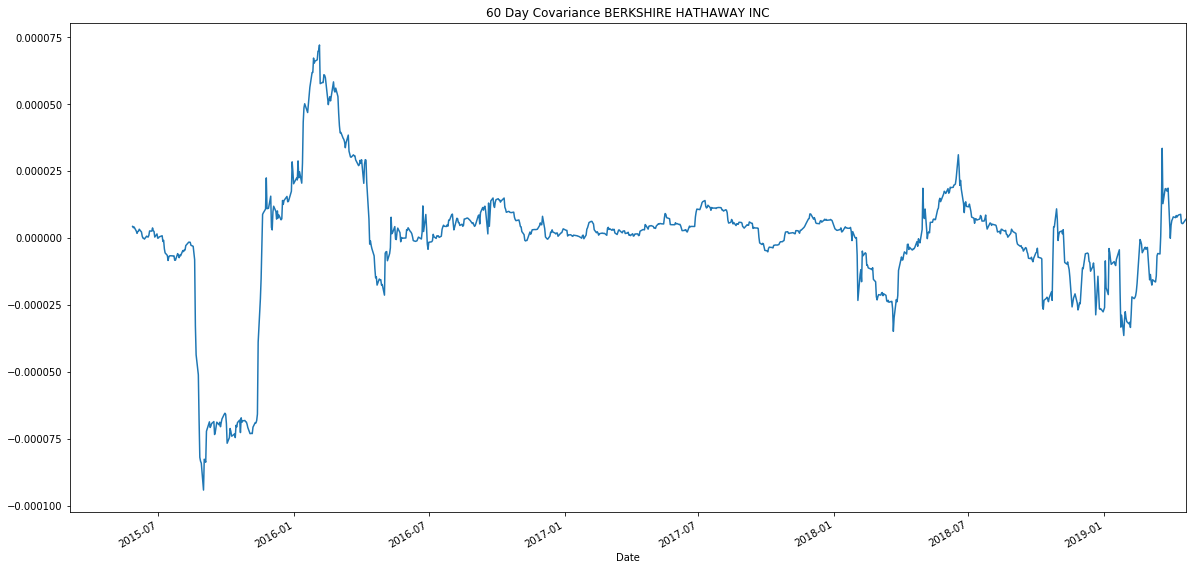

In [26]:
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='60 Day Covariance BERKSHIRE HATHAWAY INC')

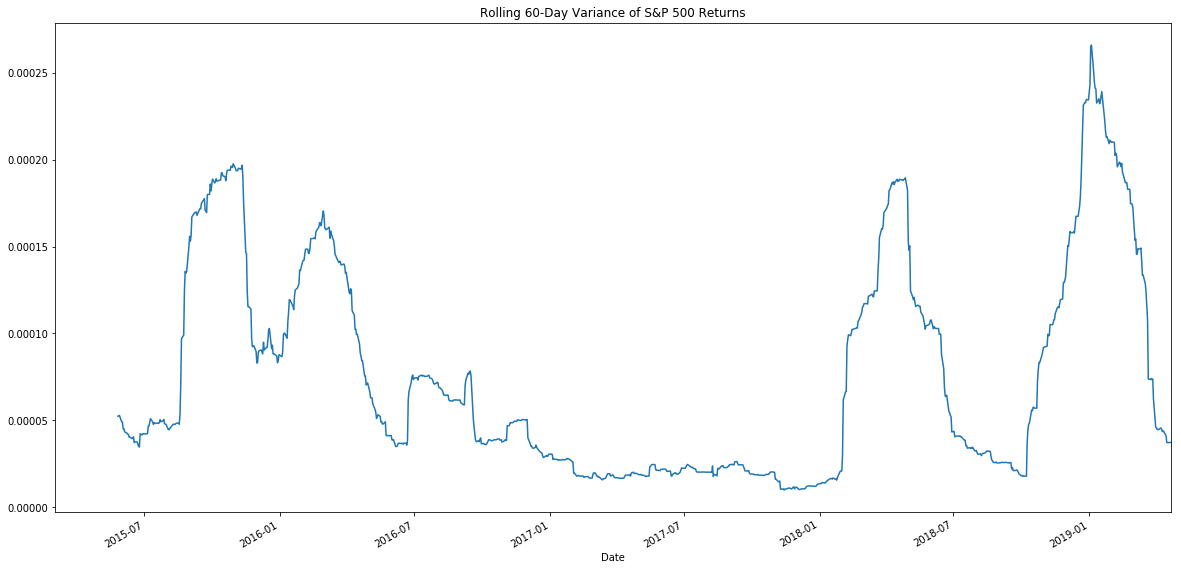

In [27]:
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')

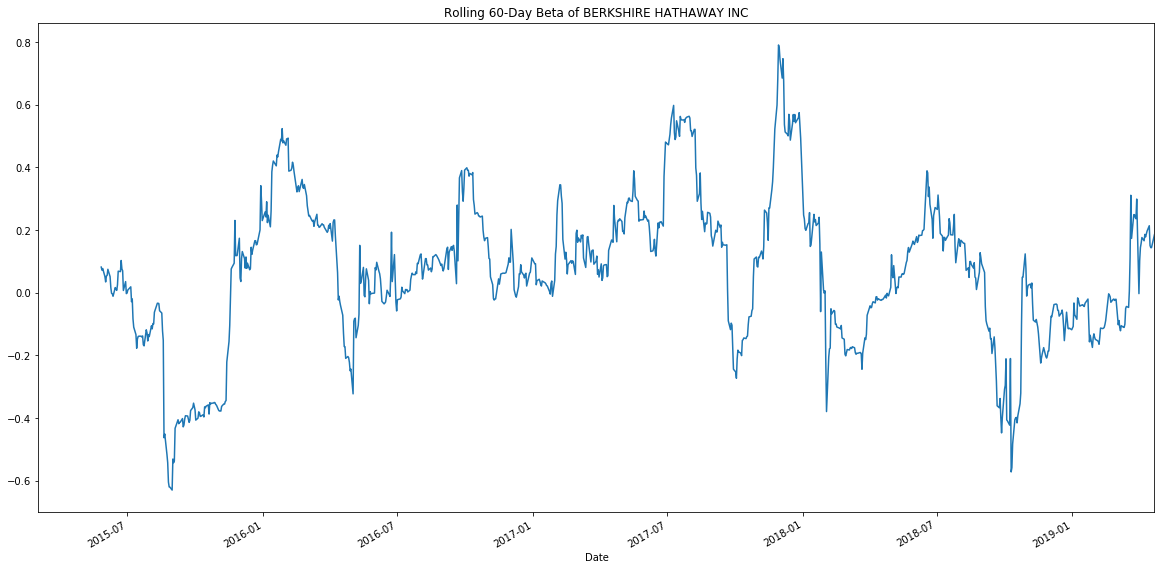

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations.

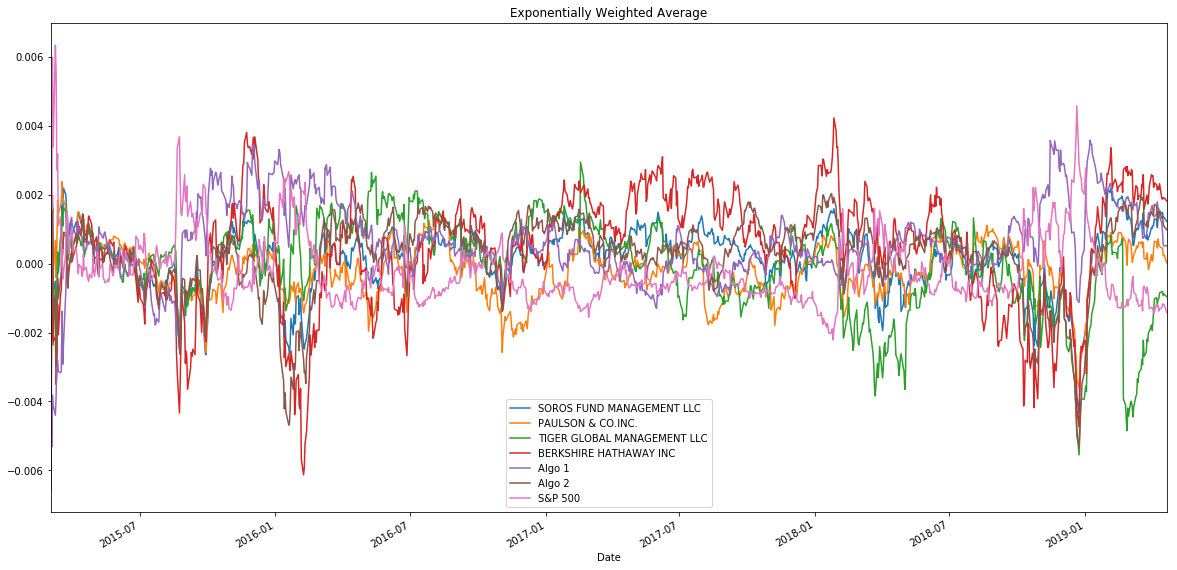

In [29]:
#EWA for all portfolios
ewm_combined_df = combined_df.ewm(halflife = 21).mean()
ewm_combined_df.plot(figsize=(20, 10), title='Exponentially Weighted Average')

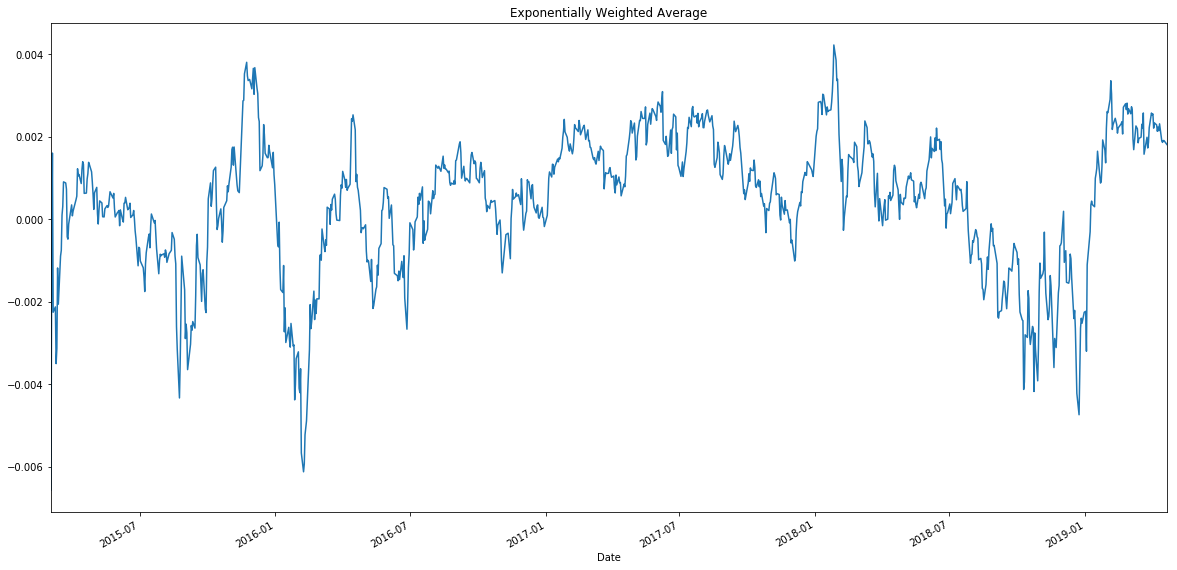

In [30]:
#EWA for Bershkire Hathaway
ewm_combined_df = combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife = 21).mean()
ewm_combined_df.plot(figsize=(20, 10), title='Exponentially Weighted Average')

---

## Sharpe Ratios


In [31]:
# Annualzied Sharpe Ratios
all_portfolio_std = combined_df.std()
all_portfolio_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [32]:
sharpe_ratios = (combined_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head(7)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

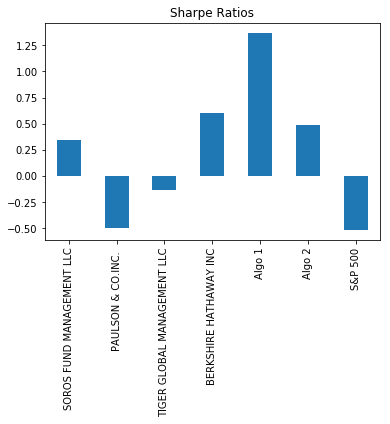

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

In this section, I build my own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

I find: 
1. EL and NTFLX have a corelation of .9
2. My portfolio does not beat the market or the Aglo portfolios. 
3. My portfolio is negatively corelated to the S&P 500 with the largest STD. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
Coty_data = yf.download('COTY','2015-01-01','2019-01-01')
Coty_data.drop(['Open','High', 'Low', 'Adj Close','Volume'], axis = 1, inplace=True)
Coty_data.columns = ['COTY']
Coty_data.head(25)

[*********************100%***********************]  1 of 1 downloaded


,COTY
Date,
2015-01-02,20.43
2015-01-05,20.37
2015-01-06,20.22
2015-01-07,20.29
2015-01-08,20.46
2015-01-09,19.86
2015-01-12,19.32
2015-01-13,19.02
2015-01-14,18.91


In [35]:
cmg_data = yf.download('CMG','2015-01-01','2019-01-01',index_col="Date", infer_datetime_format=True, parse_dates=True)
cmg_data.drop(['Open','High', 'Low', 'Adj Close','Volume'], axis = 1, inplace=True)
cmg_data.columns = ['CMG']
cmg_data.head()

[*********************100%***********************]  1 of 1 downloaded


,CMG
Date,
2015-01-02,678.40
2015-01-05,667.69
2015-01-06,664.38
2015-01-07,694.26
2015-01-08,719.99


In [36]:
nflx_data = yf.download('NFLX','2015-01-01','2019-01-01')
nflx_data.drop(['Open','High', 'Low', 'Adj Close','Volume'], axis = 1, inplace=True)
nflx_data.columns = ['NFLX']
nflx_data.head()

[*********************100%***********************]  1 of 1 downloaded


,NFLX
Date,
2015-01-02,49.85
2015-01-05,47.31
2015-01-06,46.50
2015-01-07,46.74
2015-01-08,47.78


In [37]:
el_data = yf.download('EL','2015-01-01','2019-01-01')
el_data.drop(['Open','High', 'Low', 'Adj Close','Volume'], axis = 1, inplace=True)
el_data.columns = ['EL']
el_data.head()

[*********************100%***********************]  1 of 1 downloaded


,EL
Date,
2015-01-02,75.59
2015-01-05,74.68
2015-01-06,73.99
2015-01-07,74.33
2015-01-08,75.40


In [38]:
# Concatenate all stocks into a single DataFrame
MyPortfolio_df = pd.concat([Coty_data, cmg_data, nflx_data, el_data], axis="columns", join="inner")
MyPortfolio_df.head()

,COTY,CMG,NFLX,EL
Date,,,,
2015-01-02,20.43,678.40,49.85,75.59
2015-01-05,20.37,667.69,47.31,74.68
2015-01-06,20.22,664.38,46.50,73.99
2015-01-07,20.29,694.26,46.74,74.33
2015-01-08,20.46,719.99,47.78,75.40


In [39]:
# Drop Nulls
MyPortfolio_df.dropna()

,COTY,CMG,NFLX,EL
Date,,,,
2015-01-02,20.43,678.40,49.85,75.59
2015-01-05,20.37,667.69,47.31,74.68
2015-01-06,20.22,664.38,46.50,73.99
2015-01-07,20.29,694.26,46.74,74.33
2015-01-08,20.46,719.99,47.78,75.40
2015-01-09,19.86,714.27,47.04,74.90
2015-01-12,19.32,711.70,45.55,74.26
2015-01-13,19.02,714.06,46.26,74.52
2015-01-14,18.91,709.74,46.32,74.12


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3, 1/3]
MP_daily_returns = MyPortfolio_df.pct_change()
MP_daily_returns = MP_daily_returns.dot(weights).dropna()
MP_daily_returns.head()

Date
2015-01-05   -0.027238
2015-01-06   -0.012894
2015-01-07    0.019398
2015-01-08    0.027362
2015-01-09   -0.019796
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
mp_correlation = MyPortfolio_df.corr()
mp_correlation

,COTY,CMG,NFLX,EL
COTY,1.000000,0.430914,-0.759649,-0.666305
CMG,0.430914,1.000000,-0.408166,-0.468500
NFLX,-0.759649,-0.408166,1.000000,0.926189
EL,-0.666305,-0.468500,0.926189,1.000000


In [47]:
MP_Whale_combined_df = pd.concat([MP_daily_returns, combined_df], axis="columns", join="inner")
MP_Whale_combined_df.sort_index(inplace=True)
MP_Whale_combined_df.columns = ['ALEXIS S LLC', 'SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500']
MP_Whale_combined_df.head()

,ALEXIS S LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,-0.011344,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,-0.009086,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.011136,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.026888,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.006274,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [48]:
# Only compare dates where the new, custom portfolio has dates
MP_Whale_combined_df.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

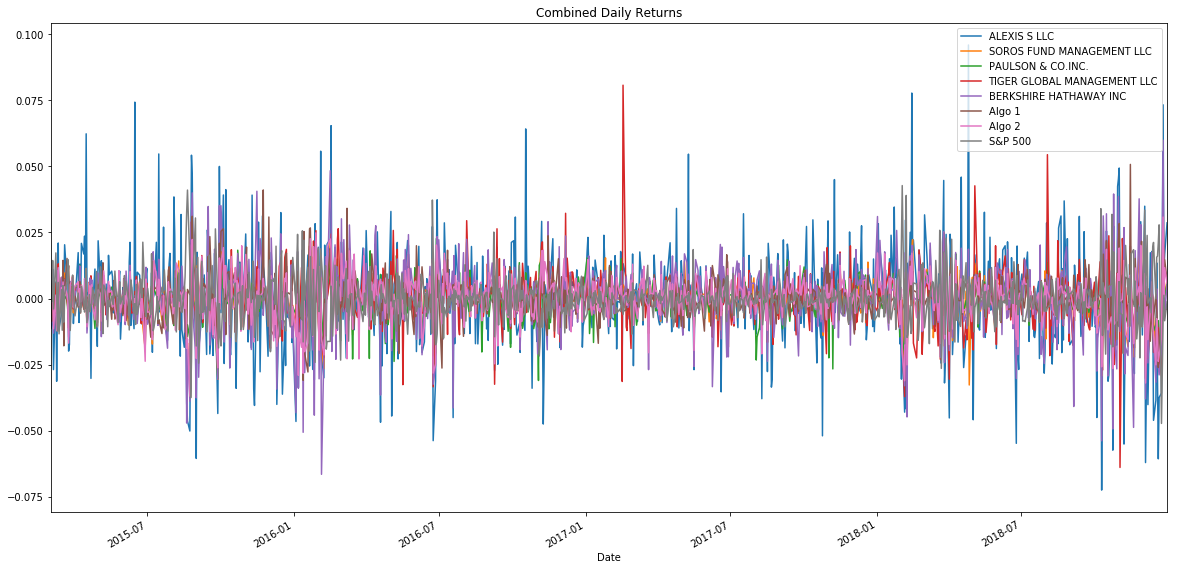

In [49]:
MP_Whale_combined_df.plot(figsize=(20,10),title=('Combined Daily Returns'))

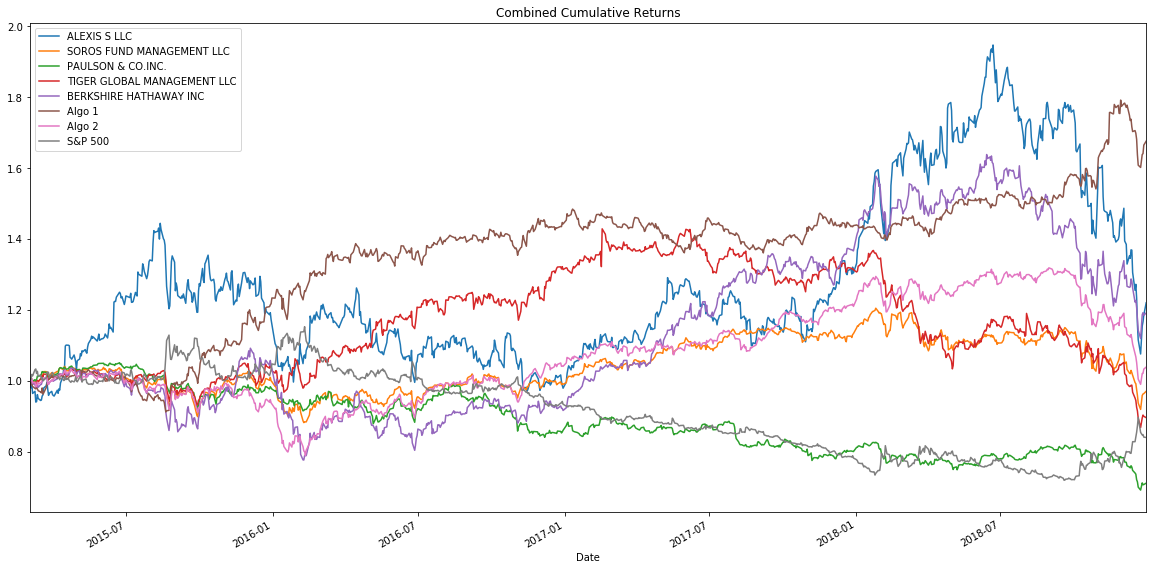

In [50]:
# Plot cumulative returns
MP_Whale_cumulative_returns = (1 + MP_Whale_combined_df).cumprod()
MP_Whale_cumulative_returns.plot(figsize=(20,10),title=('Combined Cumulative Returns'))

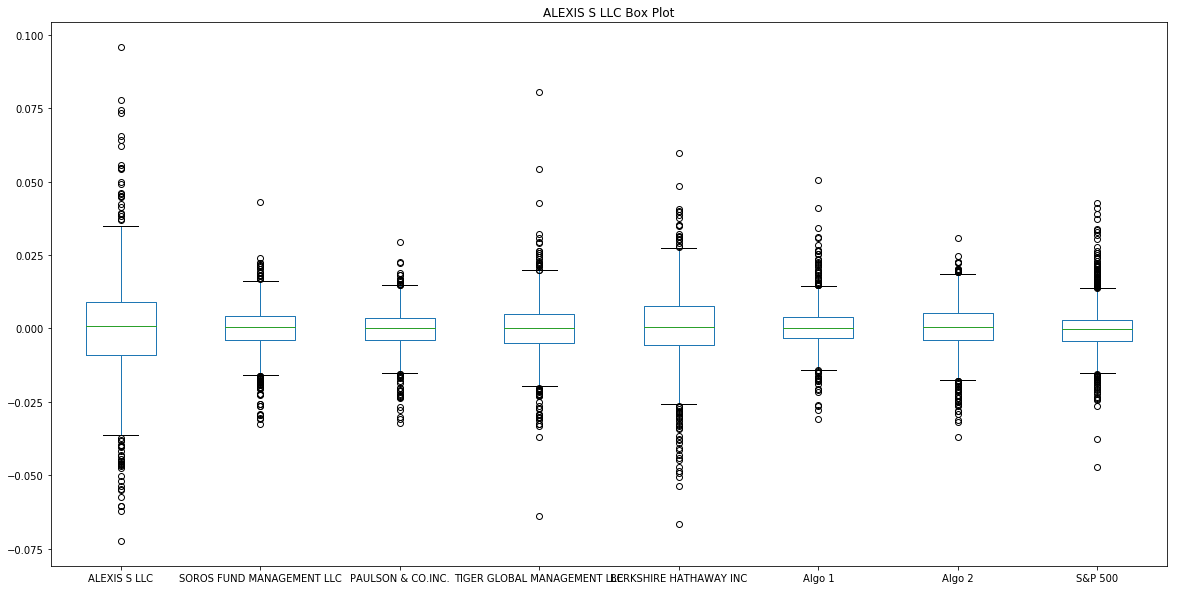

In [51]:
# Risk Assesment
MP_Whale_combined_df.plot.box(figsize=(20,10),title=('ALEXIS S LLC Box Plot'))

In [52]:
#Standard Deviation
MP_Whale_combined_std = MP_Whale_combined_df.std()
MP_Whale_combined_std.head()

ALEXIS S LLC                   0.017960
SOROS FUND MANAGEMENT LLC      0.007908
PAULSON & CO.INC.              0.007008
TIGER GLOBAL MANAGEMENT LLC    0.010107
BERKSHIRE HATHAWAY INC         0.012904
dtype: float64

In [53]:
#Sort STD
MP_Whale_daily_std = MP_Whale_combined_std.sort_values(ascending=False)
MP_Whale_daily_std.head()

ALEXIS S LLC                   0.017960
BERKSHIRE HATHAWAY INC         0.012904
TIGER GLOBAL MANAGEMENT LLC    0.010107
S&P 500                        0.008631
Algo 2                         0.008358
dtype: float64

In [54]:
#Analayse
mp_Whale_annualized_std = MP_Whale_combined_std * np.sqrt(252)
mp_Whale_annualized_std.head(8)

ALEXIS S LLC                   0.285101
SOROS FUND MANAGEMENT LLC      0.125532
PAULSON & CO.INC.              0.111243
TIGER GLOBAL MANAGEMENT LLC    0.160444
BERKSHIRE HATHAWAY INC         0.204849
Algo 1                         0.120431
Algo 2                         0.132679
S&P 500                        0.137017
dtype: float64

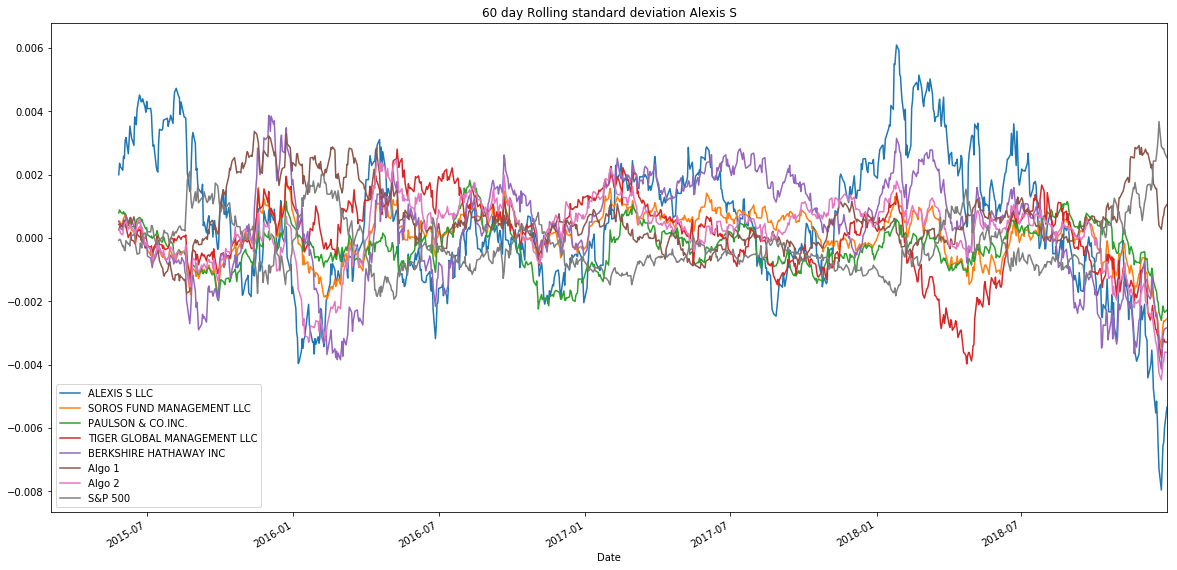

In [84]:
# Rolling Data 60 days 
MP_Whale_combined_60 = MP_Whale_combined_df.rolling(window=60).mean().plot(figsize=(20,10),title=('60 day Rolling standard deviation Alexis S'))

In [85]:
# Betaprice - Correlation
mp_correlation = MP_Whale_combined_df.corr()
mp_correlation

,ALEXIS S LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
ALEXIS S LLC,1.000000,0.563946,0.454784,0.435605,0.594417,0.226012,0.559354,-0.002717
SOROS FUND MANAGEMENT LLC,0.563946,1.000000,0.695619,0.605041,0.754396,0.335722,0.827702,-0.004137
PAULSON & CO.INC.,0.454784,0.695619,1.000000,0.468031,0.540224,0.267174,0.671442,0.011661
TIGER GLOBAL MANAGEMENT LLC,0.435605,0.605041,0.468031,1.000000,0.476361,0.184670,0.563004,-0.006481
BERKSHIRE HATHAWAY INC,0.594417,0.754396,0.540224,0.476361,1.000000,0.306683,0.682083,-0.020412
Algo 1,0.226012,0.335722,0.267174,0.184670,0.306683,1.000000,0.289346,-0.040746
Algo 2,0.559354,0.827702,0.671442,0.563004,0.682083,0.289346,1.000000,-0.007202
S&P 500,-0.002717,-0.004137,0.011661,-0.006481,-0.020412,-0.040746,-0.007202,1.000000


In [76]:
#rolling covarriance
mp_rolling_covariance = MP_Whale_combined_df['ALEXIS S LLC'].rolling(window=60).cov(combined_df['S&P 500'])


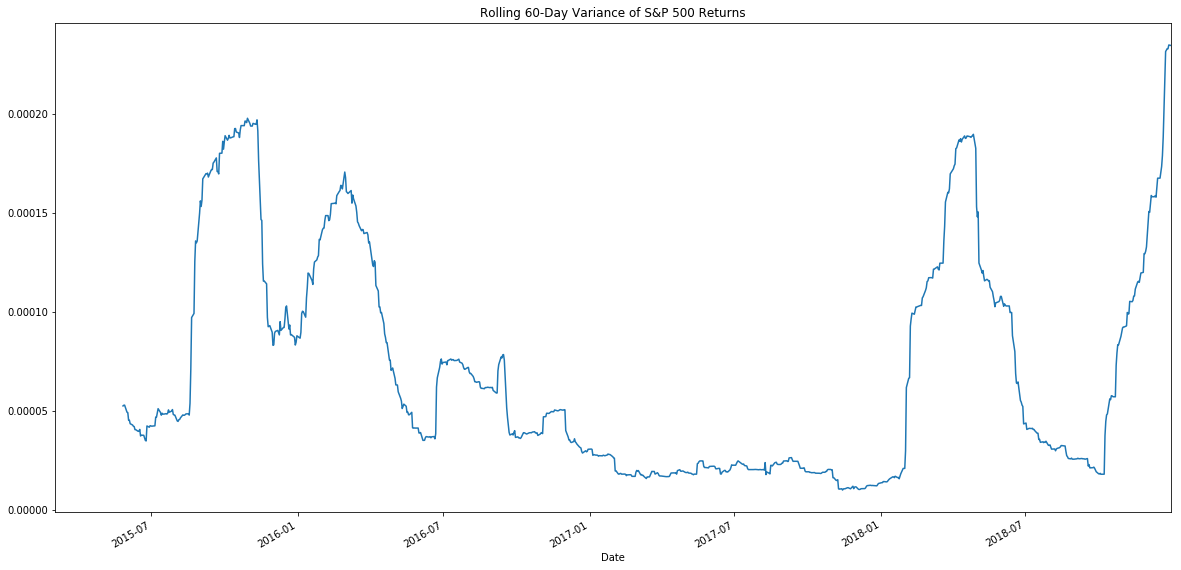

In [50]:
#rolling variance
mp_rolling_variance = MP_Whale_combined_df['S&P 500'].rolling(window=60).var()
mp_rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')

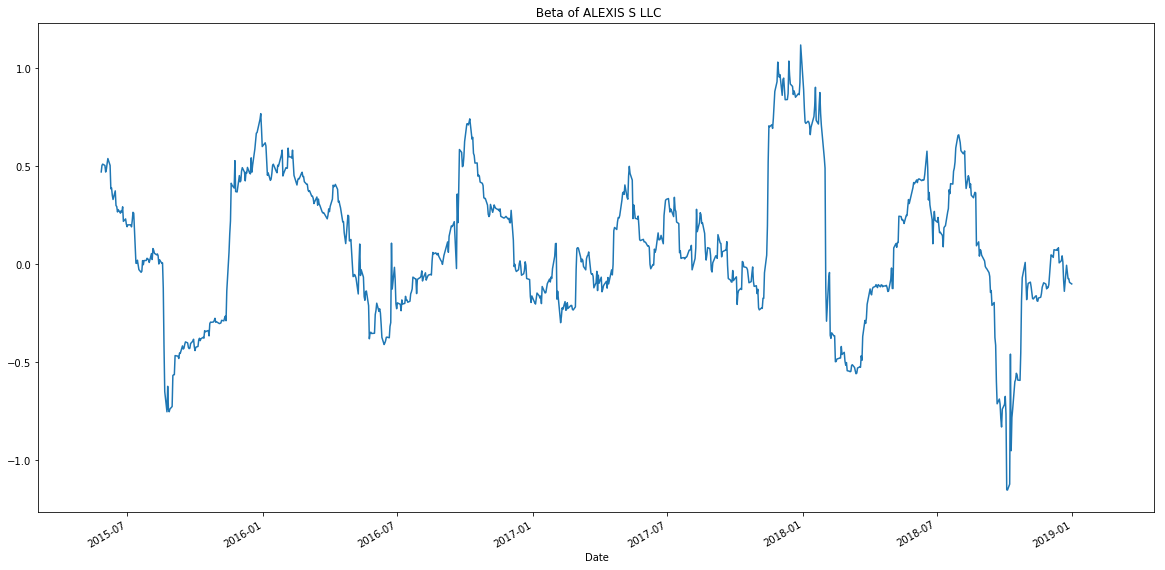

In [74]:
# Calculate Beta for my single portfolio compared to the total market (S&P 500)
mp_rolling_beta = mp_rolling_covariance / mp_rolling_variance
mp_rolling_beta.plot(figsize=(20, 10), title=' Beta of ALEXIS S LLC')


In [52]:
# Annualzied Sharpe Ratios
mp_sharpe_ratios = (MP_Whale_combined_df.mean() * 252) / (MP_Whale_combined_std * np.sqrt(252))
mp_sharpe_ratios.head()

ALEXIS S LLC                   0.324005
SOROS FUND MANAGEMENT LLC      0.000127
PAULSON & CO.INC.             -0.744129
TIGER GLOBAL MANAGEMENT LLC   -0.099093
BERKSHIRE HATHAWAY INC         0.325599
dtype: float64

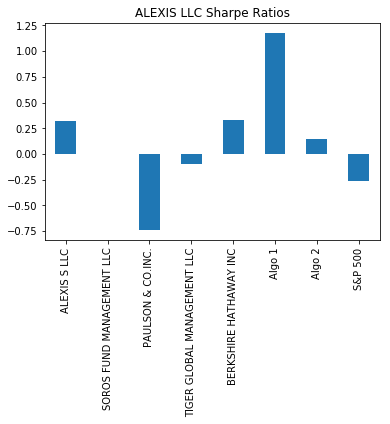

In [53]:
# Visualize the sharpe ratios as a bar plot
mp_sharpe_ratios.plot.bar(title='ALEXIS LLC Sharpe Ratios')

## Correlation Analysis to determine which stocks (if any) are correlated

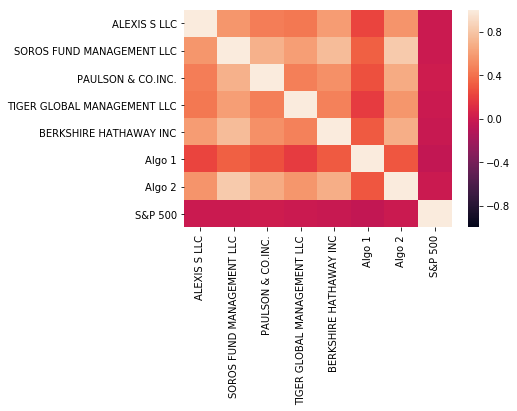

In [64]:
#Heat map of correlation 
sns.heatmap(mp_correlation, vmin=-1, vmax=1,)